# Data Exploration and Preparation

## Data

The file movies_merged contains a dataframe with the same name that has 40K rows and 39 columns. Each row represents a movie title and each column represents a descriptor such as Title, Actors, and Budget. I collected the data by querying IMDb’s API (see www.omdbapi.com) and joining it with a separate dataset of movie budgets and gross earnings (unknown to you). The join key was the movie title. This data is available for personal use, but IMDb’s terms of service do not allow it to be used for commercial purposes or for creating a competing repository.

## Objective

Your goal is to investigate the relationship between the movie descriptors and the box office success of movies, as represented by the variable Gross. This task is extremely important as it can help a studio decide which titles to fund for production, how much to bid on produced movies, when to release a title, how much to invest in marketing and PR, etc. This information is most useful before a title is released, but it is still very valuable after the movie is already released to the public (for example it can affect additional marketing spend or how much a studio should negotiate with on-demand streaming companies for “second window” streaming rights).

## Setup

### Load Packages

In [109]:
# You may load other packages like seaborn for plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

### Load Data

Load the CSV file into a dataframe called "df" and perform the following initial investigations:
    * list the dimensions of the df
    * list the head
    * list the summary
    * describe the df

In [110]:
# Code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
df = pd.read_csv("C:/Users/jivitesh's PC/Desktop/Jupyter Notebook Homework/movies.csv") 
dimension=df.shape
print(dimension)
head=df.head(5)
print(head)
summary=df.info()
print(summary)
description=df.describe()
print(description)

(40789, 40)
   Unnamed: 0              Title  Year      Rated    Released  Runtime  \
0           1  39 Pounds of Love  2005    UNRATED  2005-04-08   70 min   
1           2               3:am  2005  NOT RATED  2005-01-25   21 min   
2           3    500 Years Later  2005        NaN  2005-02-24  106 min   
3           4          5th World  2005        NaN  2005-01-20   75 min   
4           5                 90  2005        NaN  2005-03-12   14 min   

                             Genre            Director  \
0  Documentary, Biography, Romance         Dani Menkin   
1                  Short, Thriller       Ryan Bradford   
2                      Documentary  Owen Alik Shahadah   
3                   Drama, Romance     Blackhorse Lowe   
4                       War, Short          Jason Wise   

                         Writer  \
0     Ilan Heitner, Dani Menkin   
1  Ryan Bradford, Ryen Schlegel   
2                   M.K. Asante   
3               Blackhorse Lowe   
4                  

## Tasks

Each task below is worth 10 points, and is meant to be performed sequentially, i.e. do step 2 after you have processed the data as described in step 1. Total points: 100
Complete each task by implementing code chunks as described by TODO comments, and by responding to questions (“Q:”) with written answers (“A:”). If you are unable to find a meaningful or strong relationship in any of the cases when requested, explain why not by referring to appropriate plots/statistics.

### Task 1: Remove non-movie rows

The variable Type captures whether the row is a movie, a TV series, or a game. Remove all rows from df that do not correspond to movies.

In [111]:
# Your code for task 1 here:
df2=df[df.Type=="movie"]
df2.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 40788
Data columns (total 40 columns):
Unnamed: 0           40000 non-null int64
Title                40000 non-null object
Year                 40000 non-null int64
Rated                19838 non-null object
Released             35051 non-null object
Runtime              39249 non-null object
Genre                39014 non-null object
Director             39439 non-null object
Writer               36093 non-null object
Actors               38416 non-null object
Plot                 33101 non-null object
Language             38301 non-null object
Country              39438 non-null object
Awards               14727 non-null object
Poster               27015 non-null object
Metascore            5209 non-null float64
imdbRating           38866 non-null float64
imdbVotes            38828 non-null float64
imdbID               40000 non-null object
Type                 40000 non-null object
tomatoMeter          9452 non-n

Question: how many rows are left after removal?

Answer: 40000

### Task 2: Process Runtime column
The variable Runtime represents the length of the title as a string. Write Python code to convert it to a numeric
value (in minutes) and replace df.Runtime with the new numeric column RuntimeMins.

In [112]:
# Code for task 2 here
# ideally write a function here that will do the required processing 
# and then call the function on the Runtime. 
# Use Regular Expressions.

import re
import numpy as np
import pandas as pd
""" 
import matplotlib.pyplot as plt
listMatches=[]
df = pd.read_csv("C:/Users/jivitesh's PC/Desktop/Jupyter Notebook Homework/movies.csv") 
#df.Runtime.dropna(inplace=True) 
    matches=re.findall("\s*(\d+)\s*min",str(df.Runtime))
#print(list(matches),df.Runtime)

print(matches,'hi')
"""
df = pd.read_csv("C:/Users/jivitesh's PC/Desktop/Jupyter Notebook Homework/movies.csv") 
df['Runtime'].fillna(0,inplace=True)
NewVal=[]
Counter=0
df["RuntimeMins"]=np.nan
for i in (df.Runtime):
    matches=re.search("\s*(\d+)\s*|Nan",str(i))
    total = int(matches.groups()[0]) 
    NewVal.append(total)
    Counter+=1

df["RuntimeMins"]=NewVal




    





Now investigate the distribution of Runtime values and how it changes over years (variable Year, which you can bucket into decades) and in relation to the budget (variable Budget). Include any plots that illustrate.

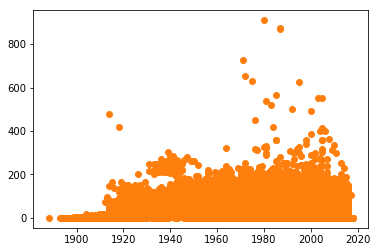

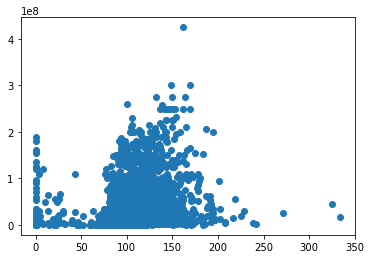

In [145]:
# Code and plots here
import matplotlib.pyplot as plt
Years=np.array(df.Year)
''' 
print(df.Year.max())
bins=[1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020]
categories=pd.cut(Years,bins)
''' 
plt.scatter((df.Year),(df.RuntimeMins))
plt.figure(figsize=(20,10))
plt.show()

plt.scatter((df.RuntimeMins),(df.Budget))
plt.show()




Question: Comment on the distribution as well as relationships. Are there any patterns or trends that you can observe? Enter answer in the below cell.

Answer:Runtime Minutes continue to increase as the years increase barring a few outliers thus there is an continous increasing trend,besides that the budget and RuntimeMins display signs of being normally distributed. 

### Task 3: Encode Genre Column

The column Genre represents a list of genres associated with the movie in a string format. Write code to parse each text string into a binary vector with 1s representing the presence of a genre and 0s the absence, and add it to the dataframe as additional columns. Then remove the original Genre column.
For example, if there are a total of 3 genres: Drama, Comedy, and Action, a movie that is both Action and Comedy should be represented by a binary vector <0, 1, 1>. Note that you need to first compile a dictionary of all possible genres and then figure out which movie has which genres.

In [114]:
# Code for task 3 here
God=df["Genre"].str.get_dummies(sep=", ")
df=pd.concat([df,God],axis=1)


df.drop(["Genre"],axis=1)


,Unnamed: 0,Title,Year,Rated,Released,Runtime,Director,Writer,Actors,Plot,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,1,39 Pounds of Love,2005,UNRATED,2005-04-08,70 min,Dani Menkin,"Ilan Heitner, Dani Menkin",Ami Ankilewitz,"This is the story of Ami, a man who while unab...",...,0,0,1,0,0,0,0,0,0,0
1,2,3:am,2005,NOT RATED,2005-01-25,21 min,Ryan Bradford,"Ryan Bradford, Ryen Schlegel","Mike Ashworth, Jen Badewitz, Ryan Bradford, Se...",Josh Coen embarks on a twisted odyssey through...,...,0,0,0,0,1,0,0,1,0,0
2,3,500 Years Later,2005,NaN,2005-02-24,106 min,Owen Alik Shahadah,M.K. Asante,"Kolfi Adu, Sona Jobarteh, Hunter Adams III, Ha...","Crime, drugs, HIV/AIDS, poor education, inferi...",...,0,0,0,0,0,0,0,0,0,0
3,4,5th World,2005,NaN,2005-01-20,75 min,Blackhorse Lowe,Blackhorse Lowe,"Livandrea Knoki, Sheldon Silentwalker, Ernest ...",Two young Navajos hitch hike home through the ...,...,0,0,1,0,0,0,0,0,0,0
4,5,90,2005,NaN,2005-03-12,14 min,Jason Wise,Jason Wise,"Bryan Barnett-Woods, Oto Brezina, Mike Dunn, E...",A holocaust survivor and an SS officer have a ...,...,0,0,0,0,1,0,0,0,1,0
5,6,Abel Raises Cain,2005,NaN,2005-01-23,82 min,"Jenny Abel, Jeff Hockett","Jenny Abel, Jeff Hockett","Alan Abel, Jeanne Abel, Frank Murgalo, Jenny Abel",Filmmaker Jenny Abel explores the life and car...,...,0,0,0,0,0,0,0,0,0,0
6,7,Acne,2000,NaN,2005-06-03,65 min,Rusty Nails,Rusty Nails,"Tracey Hayes, Rusty Nails, Jim Darley, Mary Lu...",Franny and Zoe wake up one morning ready to go...,...,0,0,0,1,0,0,0,0,0,0
7,8,One Senseless Act: The Khamisa Story,1999,NaN,NaN,0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
8,9,Akoibon,2005,NaN,2005-04-13,95 min,Edouard Baer,Edouard Baer,"Jean Rochefort, Nader Boussandel, Marie Denarn...",A disparate group of people meet at a hotel on...,...,0,0,1,0,0,0,0,0,0,0
9,10,Alien Abduction,2014,NOT RATED,2014-05-01,85 min,Matty Beckerman,Robert Lewis,"Katherine Sigismund, Corey Eid, Riley Polanski...",A vacationing family encounters an alien threa...,...,0,0,0,1,0,0,0,1,0,0


What are the 10 most common genres? Plot the relative proportions of movies having the top 10 most common genres.

    Frequency        Genre
7        9696       Comedy
5        8465        Drama
14       4146       Action
0        2888  Documentary
3        2785        Short
13       2041        Crime
19       1995    Animation
10       1486    Adventure
8        1321       Horror
11        947       Family


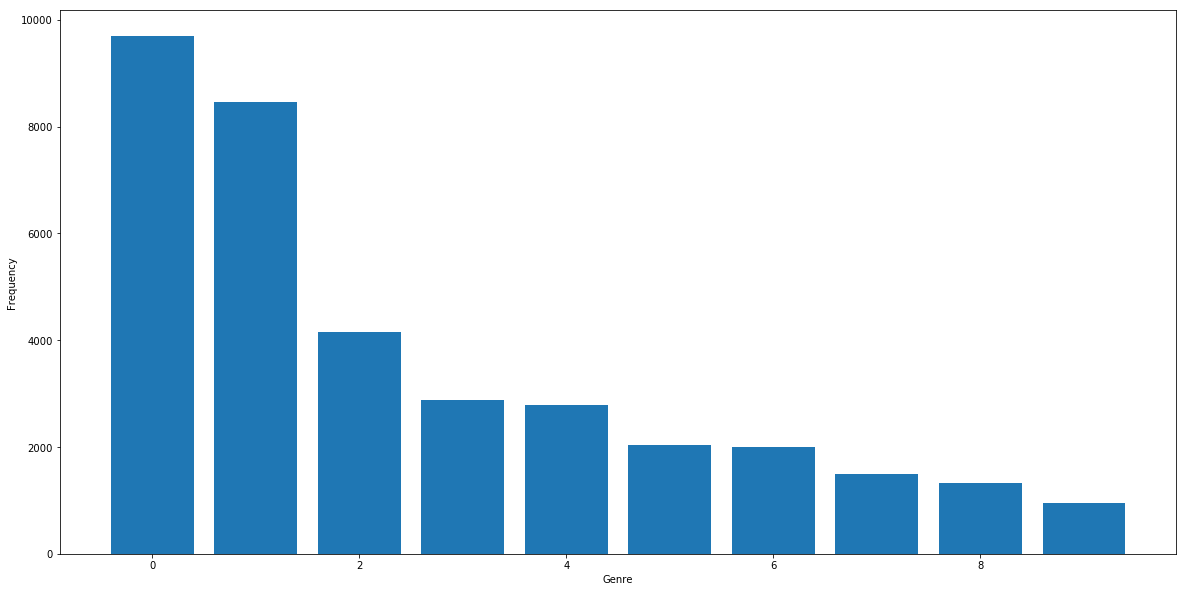

In [170]:
# Code here
GenreList=[]
FrequencyDict={}
StrippedGenreList=[]

for Genre in df.Genre.dropna():
    GenreList.append(Genre)

GenreStr=','.join(GenreList)
GenreStrList=GenreStr.split(',')

for i in GenreStrList:
    StrippedGenreList.append(i.strip())

StrippedGenreList=list(dict.fromkeys(StrippedGenreList))

for i in StrippedGenreList:
    FrequencyDict[i]=GenreStrList.count(i) 
                             
    Top_ten=pd.DataFrame({"Genre":[i for i in FrequencyDict.keys()],"Frequency":[k for k in FrequencyDict.values()]})
Top_ten.sort_values(by=["Frequency","Genre"],ascending=False,inplace=True)
OriginalTopTen=Top_ten.head(10)
print(OriginalTopTen)

length=len(OriginalTopTen["Genre"])
#Labels=[i for i in OriginalTopTen.Genre]

plt.figure(figsize=(20,10))
plt.bar(np.arange(length),OriginalTopTen["Frequency"])
plt.xlabel("Genre")
plt.ylabel("Frequency")
#plt.xticks(length,Labels)
plt.show()
 

Examine how the distribution of Runtime changes across genres for the top 10 most common genres.

In [ ]:
The Runtime

### Task 4: Eliminate mismatched rows

The dataframe was put together by merging two different sources of data and it is possible that the merging process was inaccurate in some cases (the merge was done based on movie title, but there are cases of different movies with the same title). The first source’s release time was represented by the column Year (numeric representation of the year) and the second by the column Released (string representation of release date).

Find and remove all rows where you suspect a merge error occurred based on a mismatch between these two variables. To make sure subsequent analysis and modeling work well, avoid removing more than 10% of the rows that have a Gross value present.

In [171]:
## Code for task 4
import re
import numpy as np
import pandas as pd

list1=[]
 
Free_year=df[df.Year.notnull()]
f=Free_year[Free_year.Released.notnull()]
Free_Released=f[f.Gross.notnull()]


for i in (list(Free_Released.index.values)):
    if (int(Free_Released.Released[i][0:4]) != int(Free_Released.Year[i])):
        list1.append(i)
        

    


for i in list1:
    df.drop(i)








### Task 5: Explore Gross revenue

For the commercial success of a movie, production houses want to maximize Gross revenue. Investigate if
Gross revenue is related to Budget, Runtime or Genre in any way.
Note: To get a meaningful relationship, you may have to partition the movies into subsets such as short vs. long duration, or by genre, etc.

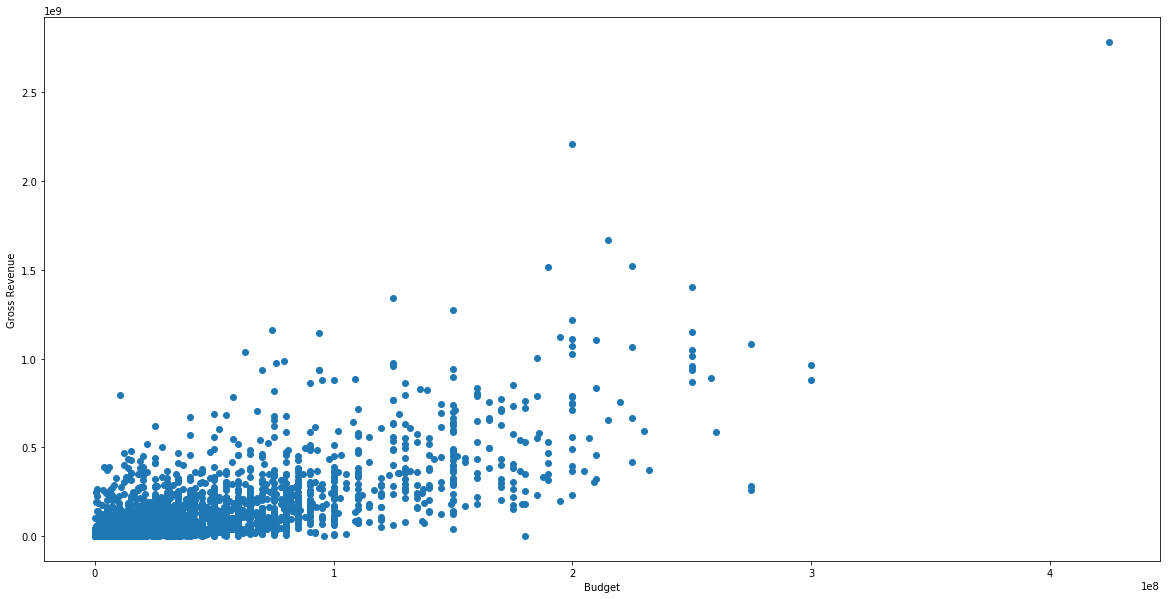

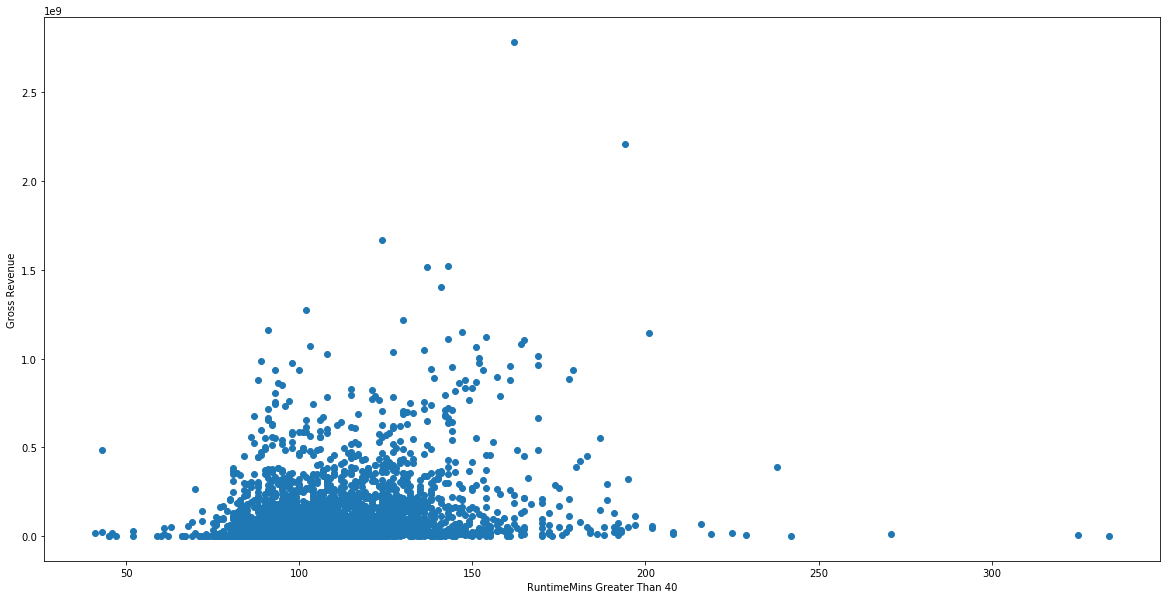

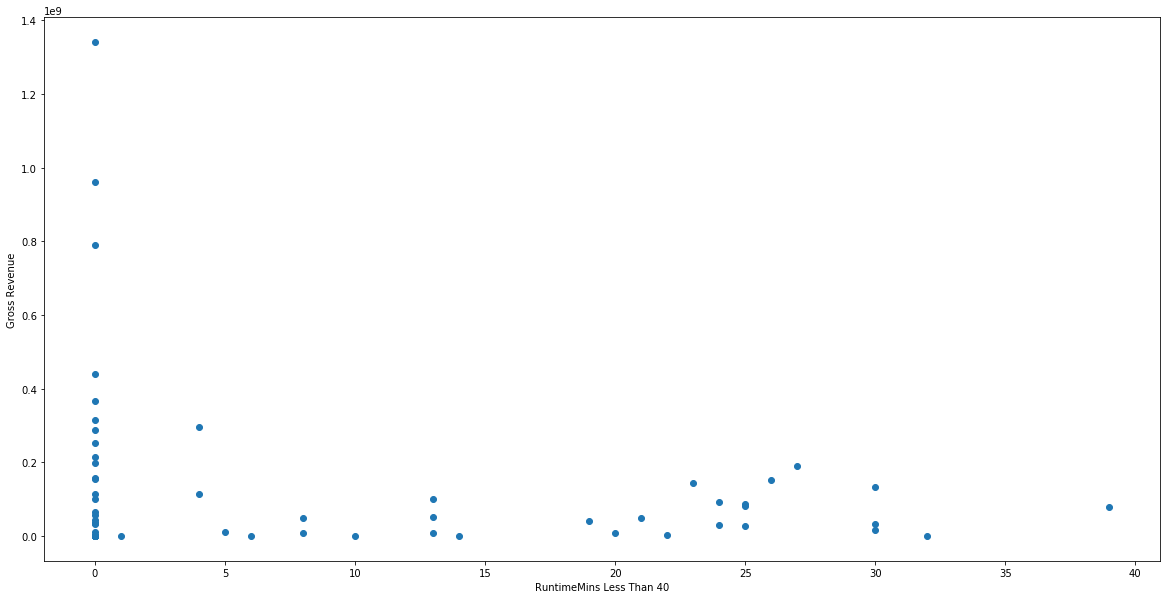

In [174]:
# Code
#gross rev vs budget
#gorss rev vs Runtime
#Gross rev vs Genre
plt.figure(figsize=(20,10))
plt.scatter((df.Budget.dropna()),(df.Gross.dropna()))
plt.xlabel("Budget")
plt.ylabel("Gross Revenue")
plt.show()

plt.figure(figsize=(20,10))
plt.scatter(df[df.RuntimeMins>40].RuntimeMins,df[df.RuntimeMins>40].Gross)
plt.xlabel("RuntimeMins Greater Than 40")
plt.ylabel("Gross Revenue")
plt.show()

plt.figure(figsize=(20,10))
plt.scatter(df[df.RuntimeMins<40].RuntimeMins,df[df.RuntimeMins<40].Gross)
plt.xlabel("RuntimeMins Less Than 40")
plt.ylabel("Gross Revenue")
plt.show()






Question: Did you find any observable relationships or combinations of Budget/Runtime/Genre that result in high Gross revenue? If you divided the movies into different subsets, you may get different answers for them - point out interesting ones.

Answer:In the 1st graph we can see that as the budget increases the gross revenue increaes too thus there is a strong postive correlation between the two.

In the 2nd graph of longer duration movies of more the 40 mins we see that as soon as the movies start getting too long more than 140 minutes the gorss revenie decreases possibly due to the movies being strecthed to long thus causing the audience to lose interest.

In the final graph we see that movies below the 40 minute range do not gain too much gross revenue possibly being too short to catch the audoences interest and the fact that short films are not as popular as long film.


### Task 6: Process Awards Column

The variable Awards describes nominations and awards in text format. Convert it to 2 numeric columns, the first capturing the number of wins, and the second capturing nominations. Replace the Awards column with these new columns, and then study the relationship of Gross revenue with respect to them.
Note that the format of the Awards column is not standard; you may have to use regular expressions to find the relevant values. Try your best to process them, and you may leave the ones that don’t have enough information as NAs or set them to 0s.

In [193]:
# code
Award=[]
Nominations=[]
NominatedFor=[]
AwardsWon=[]



for i in (df.Awards):
    matches= re.search(r"(\d+)\s*\w{10,11}",str(i))
    if i == "nan":
        Nominations.append(0)  
        continue
    if matches:
        Nominations.append(int(matches.groups()[0]))
    else:
        Nominations.append(0)


for i in (df.Awards):
    matches= re.search(r"\w{9}\s*\w{3}\s*(\d+)\s*\w*",str(i))
    if i == "nan":
        NominatedFor.append(0)
        continue
    if matches:
        NominatedFor.append(int(matches.groups()[0]))
    else:
        NominatedFor.append(0)
        
df['Nominated'] = pd.Series(Nominations)+pd.Series(NominatedFor)


        

for i in (df.Awards):
    matches= re.search(r"(\d+)\s* win",str(i))
    if i == "nan":
        Award.append(0)  
        continue
    if matches:
        Award.append(int(matches.groups()[0]))
    else:
        Award.append(0)
        

for i in (df.Awards):
    matches= re.search(r"Won\s*(\d+)",str(i))
    if i == "nan":
        AwardsWon.append(0)  
        continue
    if matches:
        AwardsWon.append(int(matches.groups()[0]))
    else:
        AwardsWon.append(0)
                         
                            

df['Awardz'] = pd.Series(Award)+pd.Series(AwardsWon)

    
len(df[df.Nominated!=0])
len(df[df.Awardz!=0])





11186

Question: How did you construct your conversion mechanism? How many rows had valid/non-zero wins or nominations?

Answer:I used regular Expressions to construct my conversion mechanisms and non-zero values in nominations: 11733 and non zero values in Awards: 11186

### Task 7: Movie ratings from IMDb and Rotten Tomatoes

There are several variables that describe ratings, including IMDb ratings (imdbRating represents average user ratings and imdbVotes represents the number of user ratings), and multiple Rotten Tomatoes ratings (represented by several variables pre-fixed by tomato). Read up on such ratings on the web (for example
rottentomatoes.com/about and www.imdb.com/help/show_leaf?votestopfaq). Investigate the pairwise relationships between these different descriptors using graphs.

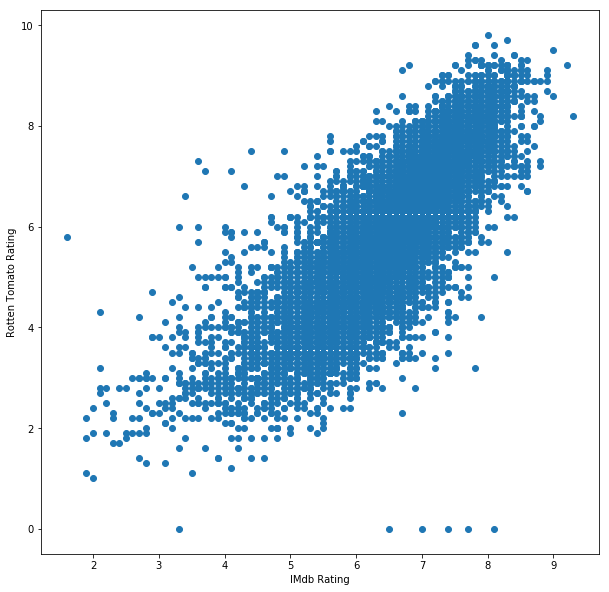

In [180]:
# Code 
plt.figure(figsize=(10,10))
plt.scatter(df.imdbRating,df.tomatoRating)
plt.xlabel("IMdb Rating")
plt.ylabel("Rotten Tomato Rating")
plt.show()

Question: Comment on the similarities and differences between the user ratings of IMDb and the critics ratings of Rotten Tomatoes.

### Task 8: Ratings and awards

These ratings typically reflect the general appeal of the movie to the public or gather opinions from a larger body of critics. Whereas awards are given by professional societies that may evaluate a movie on specific attributes, such as artistic performance, screenplay, sound design, etc.
Study the relationship between ratings and awards using graphs (awards here refers to wins and/or nomina- tions).

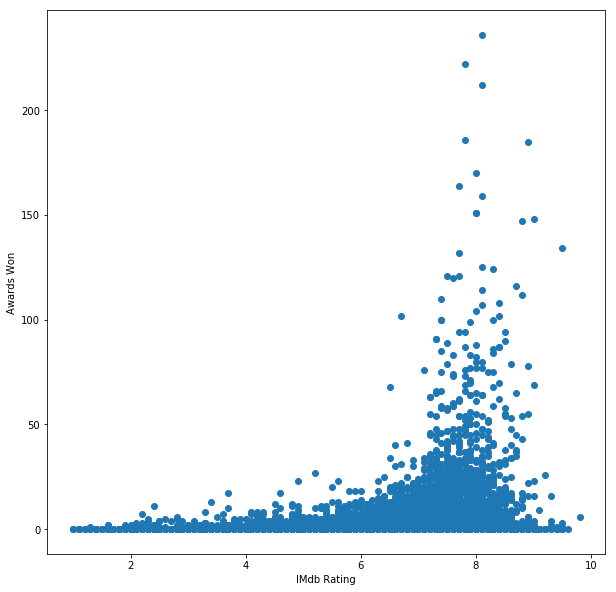

In [182]:
# Code
plt.figure(figsize=(10,10))
plt.scatter(df.imdbRating,df.Awardz)
plt.xlabel("IMdb Rating")
plt.ylabel("Awards Won")
plt.show()


Q: How good are these ratings in terms of predicting the success of a movie in winning awards or nominations? Is there a high correlation between two variables?

Answer: 

### Task 9. Expected insights
Come up with two new insights (backed up by data and graphs) that is expected. Here “new” means insights that are not an immediate consequence of one of the above tasks. You may use any of the columns already explored above or a different one in the dataset, such as Title, Actors, etc.

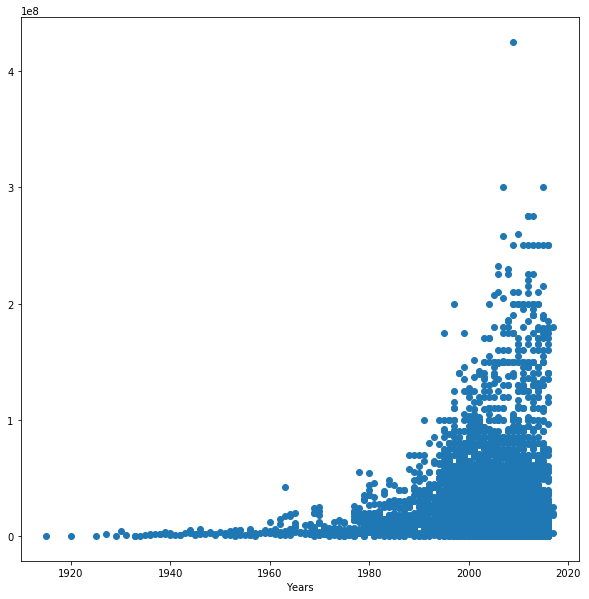

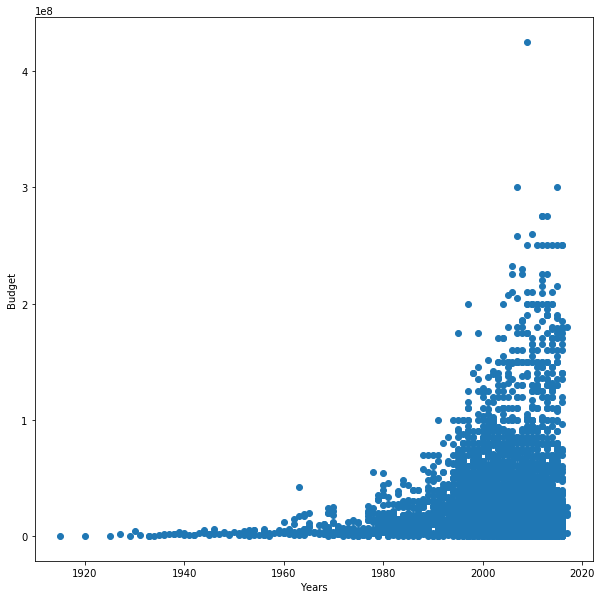

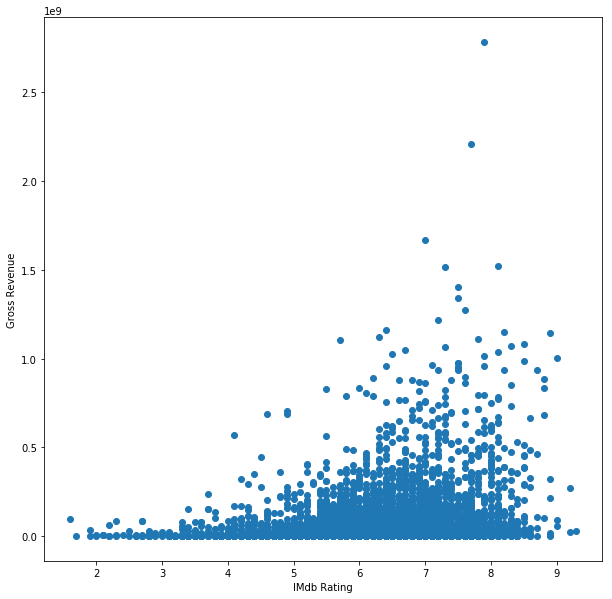

In [185]:
# code
plt.figure(figsize=(10,10))
plt.scatter(df.Year,df.Budget)
plt.xlabel("Years")
plt.ylabel("Budget")
plt.show()

plt.figure(figsize=(10,10))
plt.scatter(df.imdbRating,df.Gross)
plt.xlabel("IMdb Rating")
plt.ylabel("Gross Revenue")
plt.show()






Answer: The following insights were expected as one could already possibly guess that as the years progressed technolgy got better and budget of making films would increase and that is also the case in graph 1 as there is an exponential increase in budget as the years pass.

Similarly in graph too this insight was to be expected as shown that as teh imdb rating got higher the gross revenue of the movie would also be higher indicative that it was a popular movie and that the imdb ratings are reliable.

### Task 10. Unexpected insight
Come up with one new insight (backed up by data and graphs) that is unexpected at first glance and do your best to motivate it. Same instructions apply as the previous task.

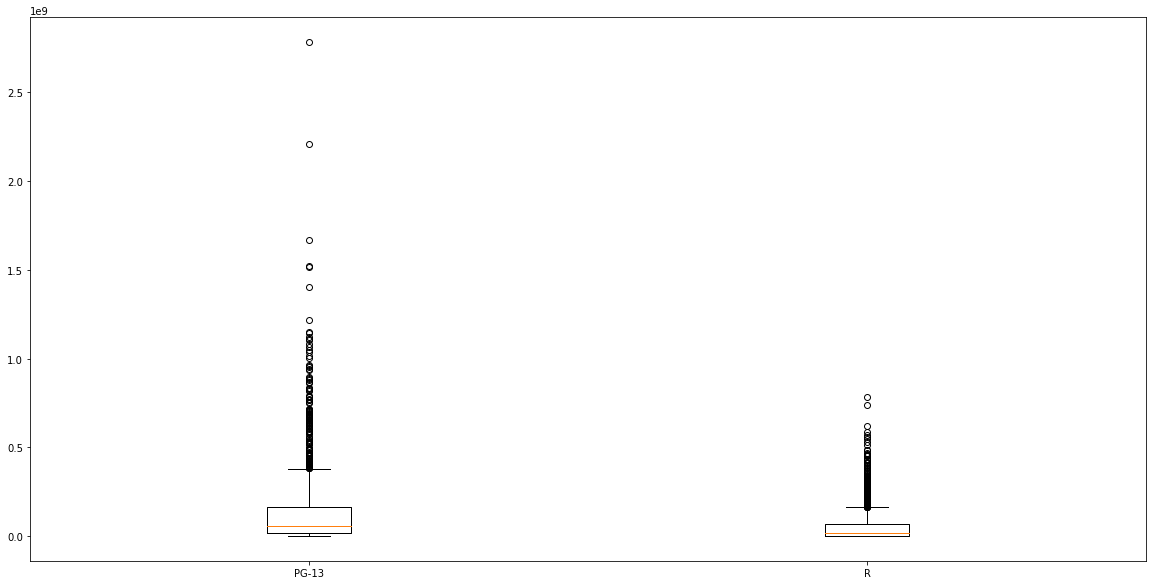

In [186]:
# Code
plt.figure(figsize=(20,10))
plt.boxplot([df[df.Rated=="PG-13"].Gross.dropna().tolist(),df[df.Rated=="R"].Gross.dropna().tolist()],labels=["PG-13","R"])
plt.show()

    





Answer: The unexpected insight we got to see was that the mean revenue of PG-13 films was higher that that of the films rated R this is suprising that the movies rated R would be more popular amongst users when compared to a movie arted PG-13